# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/temps.csv')
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [4]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [5]:
df['week']

0        Fri
1        Sat
2        Sun
3        Mon
4       Tues
       ...  
343     Tues
344      Wed
345    Thurs
346      Fri
347      Sat
Name: week, Length: 348, dtype: object

In [6]:
# LabelEncoder

pd.get_dummies(df['week'])

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,True,False,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
343,False,False,False,False,False,True,False
344,False,False,False,False,False,False,True
345,False,False,False,False,True,False,False
346,True,False,False,False,False,False,False


In [7]:
my_week = {
    "Mon": 1,
    "Tues": 2,
    "Wed": 3,
    "Thurs": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7
}

df['week_int'] = df['week'].replace(my_week)
df

C:\Users\Alberto Romero\AppData\Local\Temp\ipykernel_2620\2583436621.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['week_int'] = df['week'].replace(my_week)


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47,2
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58,3
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65,4
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42,5


In [8]:
df['autumn'] = np.where(df['month'].isin([10,11,12]), 1, 0)
df['winter'] = np.where(df['month'].isin([1,2,3]), 1, 0)
df['spring'] = np.where(df['month'].isin([4,5,6]), 1, 0)
df['summer'] = np.where(df['month'].isin([7,8,9]), 1, 0)
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47,2,1,0,0,0
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58,3,1,0,0,0
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65,4,1,0,0,0
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42,5,1,0,0,0


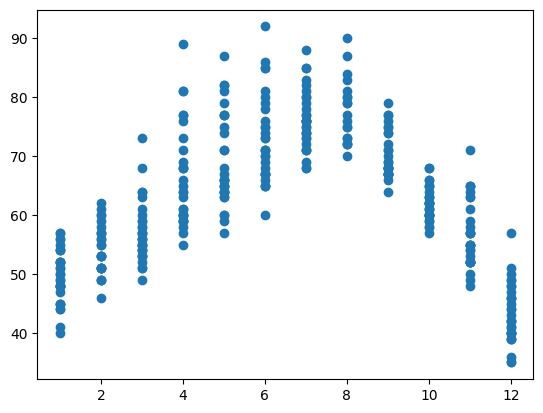

In [9]:
plt.scatter(df['month'], df['actual'])

In [10]:
df[['month', 'actual']].corr()

,month,actual
month,1.000000,0.004529
actual,0.004529,1.000000


In [11]:
my_month = {
    10:1,
    11:2,
    12:3,
    1:4,
    2:5,
    3:6,
    4:7,
    5:8,
    6:9,
    7:10,
    8:11,
    9:12
}
df['month_int'] = df['month'].replace(my_month)
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer,month_int
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0,4
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0,4
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0,4
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0,4
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47,2,1,0,0,0,3
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58,3,1,0,0,0,3
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65,4,1,0,0,0,3
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42,5,1,0,0,0,3


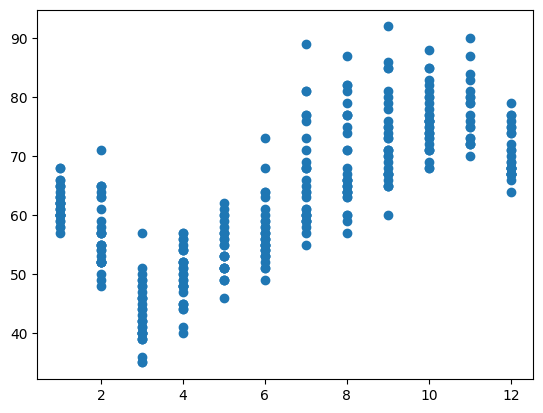

In [12]:
plt.scatter(df['month_int'], df['actual'])

In [13]:
df[['month_int', 'actual']].corr()

,month_int,actual
month_int,1.0000,0.6811
actual,0.6811,1.0000


<Axes: >

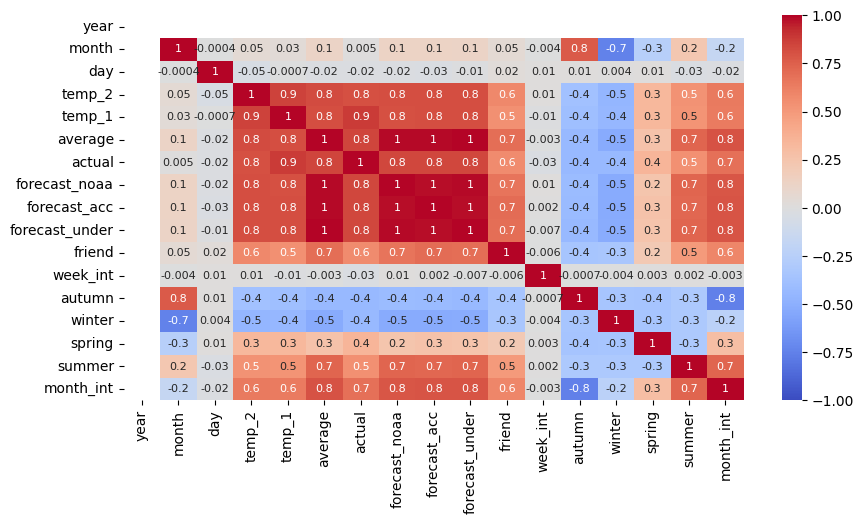

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, cmap="coolwarm", annot_kws={"size":8}, fmt=".1g")

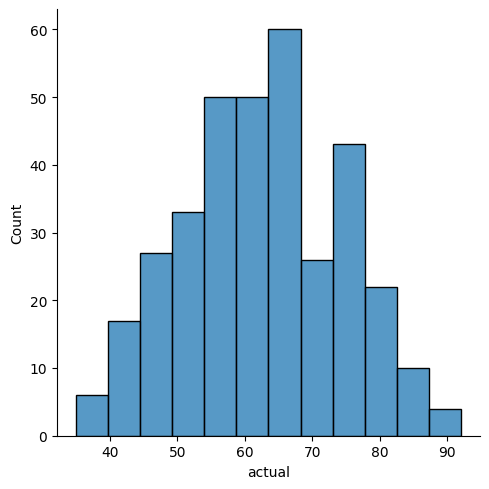

In [15]:
sns.displot(df['actual'])

### 3. Selecciona variables y divide en train y test

In [16]:
X = df[['temp_2', 'temp_1', 'average', 'month_int', 'summer', 'winter']]
y = df['actual']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 6)
(70, 6)
(278,)
(70,)


### 4. Entrena el modelo


In [19]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)

0.6722440829956915

In [20]:
dtr.score(X_train, y_train)

1.0

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [21]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_pred = dtr.predict(X_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", mean_squared_error(y_test, y_pred)**(1/2))

MAE test 5.285714285714286
MAPE test 0.08450461325304627
MSE test 45.82857142857143
RMSE test 6.769680304753795


In [22]:
y_pred = dtr.predict(X_train)

print("MAE train", mean_absolute_error(y_train, y_pred))
print("MAPE train", mean_absolute_percentage_error(y_train, y_pred))
print("MSE train", mean_squared_error(y_train, y_pred))
print("RMSE train", mean_squared_error(y_train, y_pred)**(1/2))

MAE train 0.0
MAPE train 0.0
MSE train 0.0
RMSE train 0.0


### 6. Representa el árbol de decisión

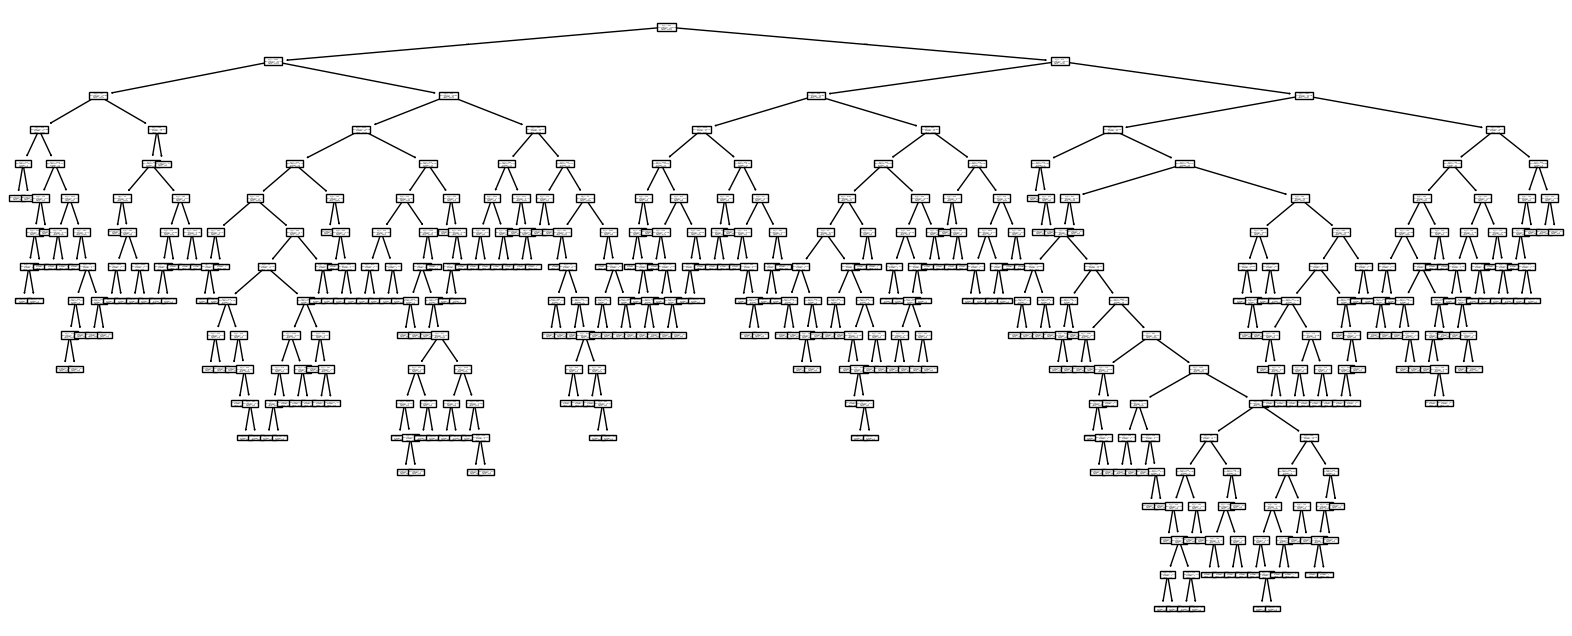

In [23]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,8))
plot_tree(dtr);

In [24]:
dtr.feature_importances_

array([3.64507936e-02, 7.88991347e-01, 1.49492035e-01, 2.11740147e-02,
       6.27198644e-04, 3.26461136e-03])

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [25]:
dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

### 8. Vuelve a evaluar tu modelo

In [26]:
y_pred = dtr.predict(X_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", mean_squared_error(y_test, y_pred)**(1/2))
print("R2 score", dtr.score(X_test, y_test))

MAE test 4.267242249556827
MAPE test 0.0674392768128964
MSE test 30.946461197509944
RMSE test 5.5629543587476915
R2 score 0.7786776796296856


In [27]:
y_pred = dtr.predict(X_train)

print("MAE train", mean_absolute_error(y_train, y_pred))
print("MAPE train", mean_absolute_percentage_error(y_train, y_pred))
print("MSE train", mean_squared_error(y_train, y_pred))
print("RMSE train", mean_squared_error(y_train, y_pred)**(1/2))
print("R2 score", dtr.score(X_train, y_train))

MAE train 3.675752083754991
MAPE train 0.05874668452706153
MSE train 22.14996536445183
RMSE train 4.706374970659672
R2 score 0.8397458755018086


### 9. Vuelve a representar su árbol

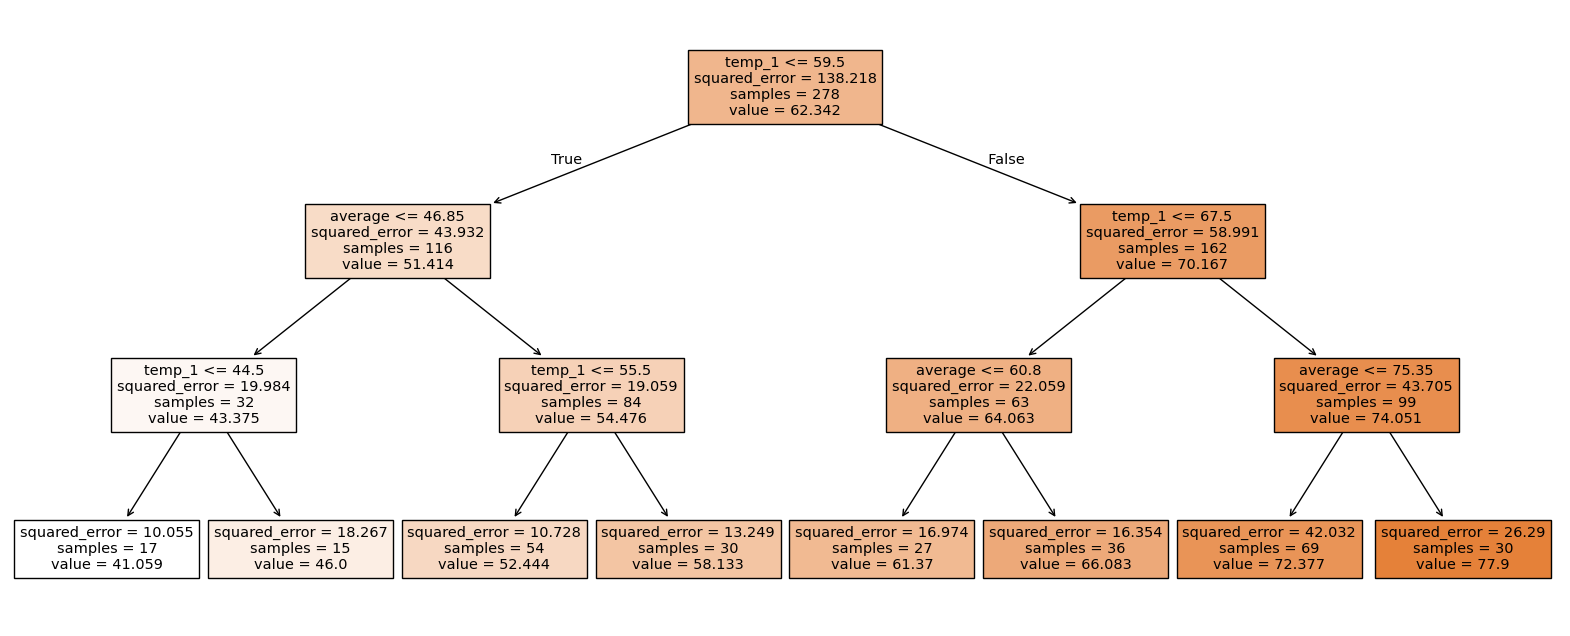

In [28]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,8))
plot_tree(dtr, feature_names=X_train.columns, filled=True);

In [29]:
X.columns

Index(['temp_2', 'temp_1', 'average', 'month_int', 'summer', 'winter'], dtype='object')

In [30]:
dtr.feature_importances_

array([0.        , 0.88110924, 0.11889076, 0.        , 0.        ,
       0.        ])

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
model = DecisionTreeRegressor()

parameters = {
    "criterion": ['squared_error', 'absolute_error'],
    "min_samples_leaf": [10,20,30],
    "max_depth": np.arange(2,10)
}

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error", verbose=2)

In [33]:
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=30; 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [10, 20, 30]},
             scoring='neg_mean_absolute_error', verbose=2)

In [34]:
print(dtr_gs.best_estimator_)
print(dtr_gs.best_score_)
print(dtr_gs.best_params_)

DecisionTreeRegressor(criterion='absolute_error', max_depth=np.int64(4),
                      min_samples_leaf=20)
-4.029058441558442
{'criterion': 'absolute_error', 'max_depth': np.int64(4), 'min_samples_leaf': 20}


In [ ]:
h_model = dtr_gs.best_estimator_

y_pred = h_model.predict(X_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", mean_squared_error(y_test, y_pred)**(1/2))
print("R2 score", dtr.score(X_test, y_test)) # creo que es dtr_gs

MAE test 4.1
MAPE test 0.06566005427390616
MSE test 25.892857142857142
RMSE test 5.088502445991074
R2 score 0.7786776796296856


In [36]:
from sklearn.model_selection import cross_val_score

results_cv = cross_val_score(h_model, X, y, scoring="neg_mean_absolute_error", cv=5)
print(results_cv)
print(results_cv.mean())
print(results_cv.std())

[-4.17142857 -6.78571429 -4.05       -3.8115942  -5.47101449]
-4.857950310559007
1.1234837374938589


In [37]:

results_cv = cross_val_score(dtr, X, y, scoring="neg_mean_absolute_error", cv=5)
print(results_cv)
print(results_cv.mean())
print(results_cv.std())

[-3.66640009 -6.84718382 -4.61461039 -3.8622446  -5.372113  ]
-4.872510379426765
1.156787737533084


### 11. Obten el `feature_importances` de cada variable en el último modelo

In [38]:
h_model.feature_importances_

array([0.        , 0.83028571, 0.16971429, 0.        , 0.        ,
       0.        ])

<Axes: >

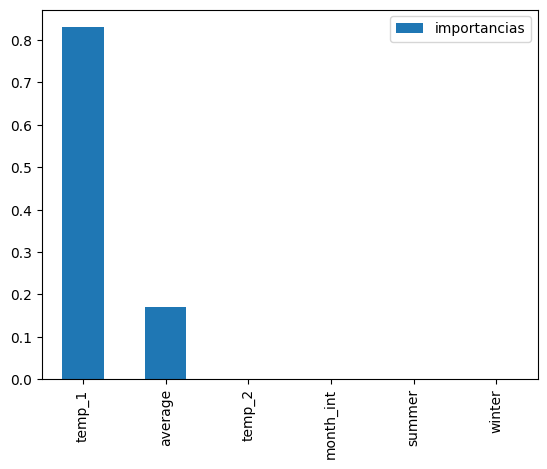

In [39]:
pd.DataFrame({"importancias": h_model.feature_importances_}, index=X.columns).sort_values("importancias", ascending=False).plot(kind='bar')

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [40]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer,month_int
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483,3.991379,0.261494,0.252874,0.261494,0.224138,6.339080
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179,2.000702,0.440081,0.435285,0.440081,0.417614,3.404518
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000,4.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000,6.000000,1.000000,1.000000,1.000000,0.000000,9.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000,7.000000,1.000000,1.000000,1.000000,1.000000,12.000000


In [41]:
df['actual_c'] = np.where(df['actual'] > 59, 1, 0)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer,month_int,actual_c
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0,4,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0,4,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0,4,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0,4,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0,4,0


In [42]:
df['actual_c'].value_counts(normalize=True)

actual_c
1    0.586207
0    0.413793
Name: proportion, dtype: float64

In [43]:
X = df[['temp_1', 'average']]
y = df['actual_c']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 2)
(70, 2)
(278,)
(70,)


In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
model = DecisionTreeClassifier()

parameters = {
    "criterion": ['gini', 'entropy'],
    "min_samples_leaf": [10,20,30],
    "max_depth": np.arange(2,10)
}

dtc_gs = GridSearchCV(model, parameters, cv=5, scoring="accuracy", verbose=2)

In [47]:
dtc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=30; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_sa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [10, 20, 30]},
             scoring='accuracy', verbose=2)

In [48]:
print(dtc_gs.best_estimator_)
print(dtc_gs.best_score_)
print(dtc_gs.best_params_)

DecisionTreeClassifier(criterion='entropy', max_depth=np.int64(3),
                       min_samples_leaf=10)
0.8957142857142857
{'criterion': 'entropy', 'max_depth': np.int64(3), 'min_samples_leaf': 10}


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [50]:
h_model = dtc_gs.best_estimator_

y_pred = h_model.predict(X_test)

print("accuracy_score", accuracy_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("f1_score", f1_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

accuracy_score 0.9
precision_score 0.8723404255319149
recall_score 0.9761904761904762
f1_score 0.9213483146067416
roc_auc_score 0.8809523809523809
confusion_matrix
 [[22  6]
 [ 1 41]]


In [51]:
results_cv = cross_val_score(h_model, X, y, cv=5, scoring="accuracy")
print(results_cv)
print(results_cv.mean())
print(results_cv.std())

[0.67142857 0.88571429 0.58571429 0.91304348 0.86956522]
0.7850931677018633
0.1313796008286965


In [52]:
h_model.feature_importances_

array([0.15076316, 0.84923684])

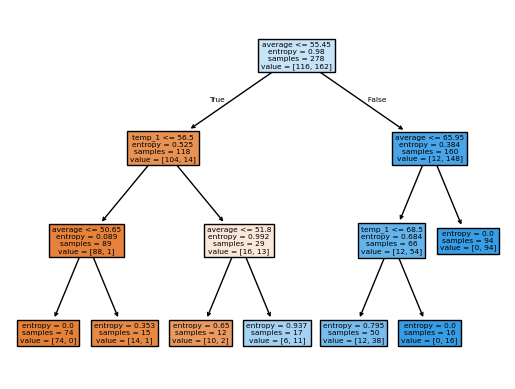

In [53]:
plot_tree(h_model, feature_names=X.columns, filled=True);

### 13. Construye un nuevo modelo `RandomForestClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [54]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [55]:
parameters = {
    "n_estimators": [50,100,200],
    "criterion": ['gini', 'entropy'],
    "min_samples_leaf": [10,20,30],
    "max_depth": np.arange(2,10)
}

rfc_gs = GridSearchCV(model, parameters, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)

In [56]:
rfc_gs.fit(X_train, y_train)
print(rfc_gs.best_estimator_)
print(rfc_gs.best_score_)
print(rfc_gs.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
RandomForestClassifier(criterion='entropy', max_depth=np.int64(2),
                       min_samples_leaf=10, n_estimators=50)
0.9246103896103897
{'criterion': 'entropy', 'max_depth': np.int64(2), 'min_samples_leaf': 10, 'n_estimators': 50}


In [57]:
h_model = rfc_gs.best_estimator_

y_pred = h_model.predict(X_test)

print("accuracy_score", accuracy_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("f1_score", f1_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

accuracy_score 0.9285714285714286
precision_score 0.9111111111111111
recall_score 0.9761904761904762
f1_score 0.9425287356321839
roc_auc_score 0.9166666666666667
confusion_matrix
 [[24  4]
 [ 1 41]]


In [58]:
h_model.predict_proba([[56,60]])

c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.48421175, 0.51578825]])

In [59]:
h_model.feature_importances_

array([0.47698156, 0.52301844])